In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data
df = pd.read_csv('wdbc.data',header=None, delimiter=',')

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
# Convert categorical data to numerical data using LabelEncoder
le = LabelEncoder()
df[1] = le.fit_transform(df[1])

df.drop(columns=df.columns[0], axis=1, inplace=True) # id
df.columns = range(df.columns.size) # start from 0

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.info()

In [ ]:
df.describe()

In [6]:
print(f'df null values: {df.isnull().sum(axis=1).sum()}')
print(f'df NaN values: {df.isna().sum(axis=1).sum()}')

df null values: 0
df NaN values: 0


In [6]:
y = df.iloc[:, 0]
df = df.iloc[:, 1:]
df.columns = range(df.columns.size) # start from 0

In [7]:
y.value_counts()

,count
0,
0,357
1,212


In [8]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
# create a new DataFrame with the scaled data
x_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=42)

In [11]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(class_weight="balanced")

# fit the model with data
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

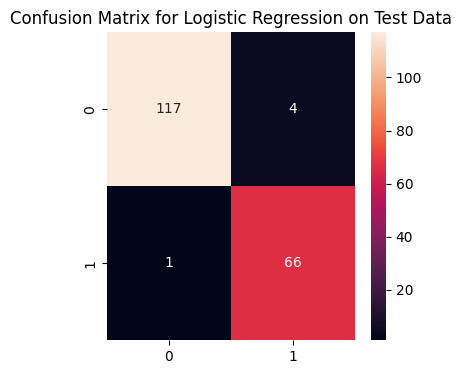

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title("Confusion Matrix for Logistic Regression on Test Data")
plt.show()

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       121
           1       0.94      0.99      0.96        67

    accuracy                           0.97       188
   macro avg       0.97      0.98      0.97       188
weighted avg       0.97      0.97      0.97       188



In [ ]:
##### without LogisticRegresion library ####

In [14]:
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Prediction Function
# X is the feature matrix, θ is the weight vector
def predict(X, weights):
    return sigmoid(np.dot(X, weights))

# Loss Function
def binary_cross_entropy(y, y_pred):
    m = len(y)
    return -1 / m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# Gradient Descent Update
def gradient_descent(X, y, weights, learning_rate):
    m = len(y)
    y_pred = predict(X, weights)
    gradients = np.dot(X.T, (y_pred - y)) / m
    weights -= learning_rate * gradients
    return weights

# Logistic Regression Training
def train_logistic_regression(X, y, learning_rate=0.01, epochs=1000):
    # Add intercept term (bias)
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    weights = np.zeros(X.shape[1])

    for epoch in range(epochs):
        y_pred = predict(X, weights)
        loss = binary_cross_entropy(y, y_pred)
        weights = gradient_descent(X, y, weights, learning_rate)

        if epoch % 3 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return weights

# Evaluation
def evaluate_model(X, y, weights):
    X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add intercept
    y_pred_probs = predict(X, weights)
    y_pred = (y_pred_probs >= 0.5).astype(int)  # Convert probabilities to binary predictions

    accuracy = np.mean(y_pred == y) * 100
    print(f"Accuracy: {accuracy:.2f}%")

    # Calculate confusion matrix
    cm = confusion_matrix(y, y_pred)

    # Print confusion matrix
    print("Confusion Matrix:")
    print(cm)


In [15]:
# Train model
weights = train_logistic_regression(x_train, y_train, learning_rate=0.1, epochs=100)

# Evaluate model
print("Training Data:")
evaluate_model(x_train, y_train, weights)

print("Testing Data:")
evaluate_model(x_test, y_test, weights)

Epoch 0, Loss: 0.6931
Epoch 3, Loss: 0.3814
Epoch 6, Loss: 0.2955
Epoch 9, Loss: 0.2524
Epoch 12, Loss: 0.2255
Epoch 15, Loss: 0.2067
Epoch 18, Loss: 0.1926
Epoch 21, Loss: 0.1816
Epoch 24, Loss: 0.1727
Epoch 27, Loss: 0.1653
Epoch 30, Loss: 0.1590
Epoch 33, Loss: 0.1537
Epoch 36, Loss: 0.1490
Epoch 39, Loss: 0.1449
Epoch 42, Loss: 0.1412
Epoch 45, Loss: 0.1380
Epoch 48, Loss: 0.1350
Epoch 51, Loss: 0.1323
Epoch 54, Loss: 0.1299
Epoch 57, Loss: 0.1276
Epoch 60, Loss: 0.1255
Epoch 63, Loss: 0.1236
Epoch 66, Loss: 0.1218
Epoch 69, Loss: 0.1201
Epoch 72, Loss: 0.1186
Epoch 75, Loss: 0.1171
Epoch 78, Loss: 0.1157
Epoch 81, Loss: 0.1144
Epoch 84, Loss: 0.1132
Epoch 87, Loss: 0.1120
Epoch 90, Loss: 0.1109
Epoch 93, Loss: 0.1098
Epoch 96, Loss: 0.1088
Epoch 99, Loss: 0.1078
Training Data:
Accuracy: 98.16%
Confusion Matrix:
[[235   1]
 [  6 139]]
Testing Data:
Accuracy: 98.40%
Confusion Matrix:
[[119   2]
 [  1  66]]
